# First level (basic) analysis

In [1]:
import pandas as pd
from techminer import RecordsDataFrame

rdf = RecordsDataFrame(
    pd.read_json(
        'step-06.json', 
        orient='records', 
        lines=True))

In this part, a basic analysis of the bibliographical information is done. The term 'basic'  refers to analyses that can be made by executing queries over a field of the dataframe.

* documents_by_terms

* documents_by_year

* citations_by_terms

* citations_by_year


## Documents by terms

* Document type

* Source title

* Authors

* Affiliation

* Country

* Author Keywords

* Index Keywords

* Number of authors

### By document type

In [2]:
rdf.documents_by_terms('Document Type')

,Document Type,Num Documents
0,Article,258
4,Conference Paper,187
3,Book Chapter,25
6,Review,11
2,Book,7
5,Note,2
1,Article in Press,1
7,Short Survey,1


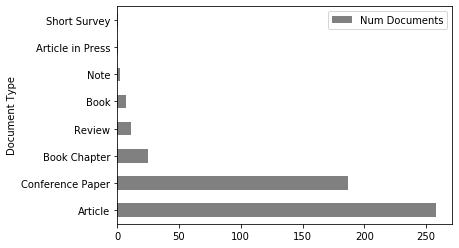

In [3]:
rdf.documents_by_terms('Document Type').plot.barh('Document Type', 'Num Documents', color='gray');

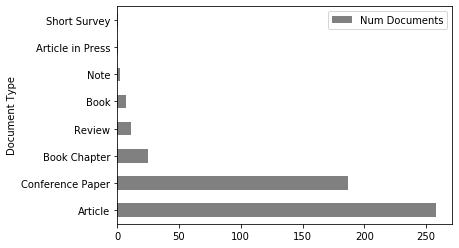

In [4]:
rdf.documents_by_terms('Document Type').barhplot();

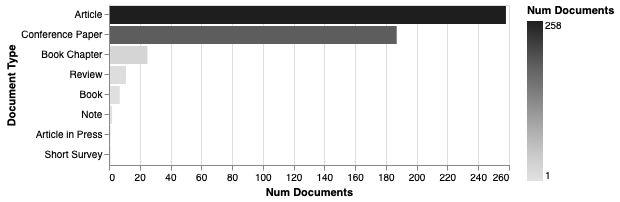

In [5]:
rdf.documents_by_terms('Document Type').barhplot('altair')

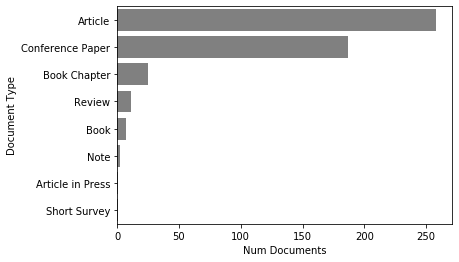

In [6]:
rdf.documents_by_terms('Document Type').barhplot('seaborn');

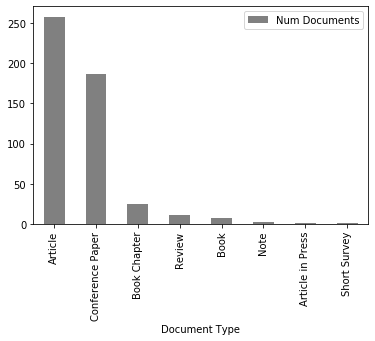

In [7]:
rdf.documents_by_terms('Document Type').barplot();

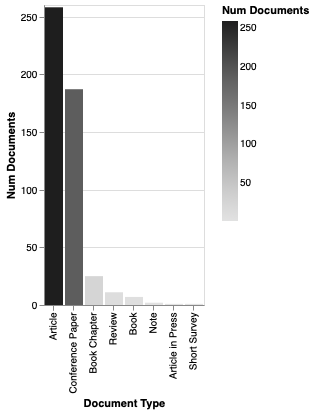

In [8]:
rdf.documents_by_terms('Document Type').barplot('altair')

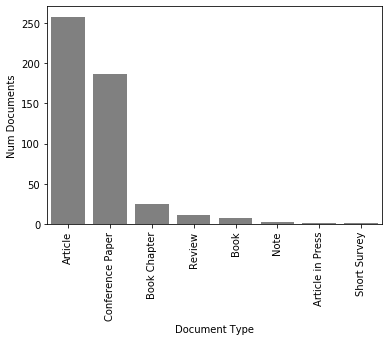

In [9]:
rdf.documents_by_terms('Document Type').barplot('seaborn');

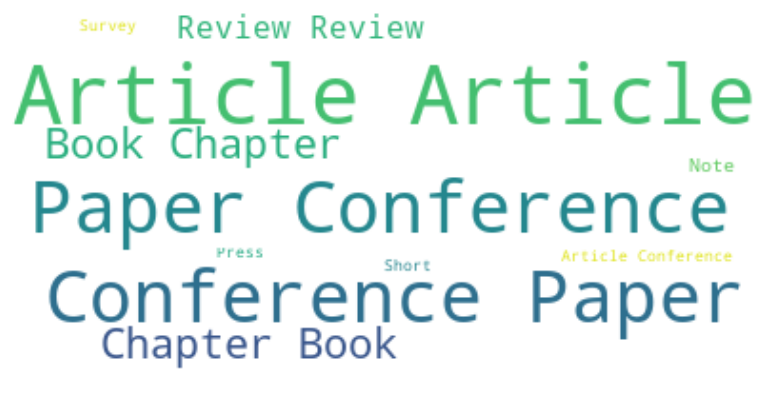

In [10]:
rdf.documents_by_terms('Document Type').wordcloud()

### Number of authors per document

In [11]:
rdf['Num Authors'] = rdf['Author(s) ID'].map(lambda x: len(x.split(';')))
rdf.documents_by_terms('Num Authors')

,Num Authors,Num Documents
2,3,161
3,4,130
1,2,86
4,5,67
5,6,31
6,7,9
8,9,3
7,8,2
0,1,1
9,12,1


### Number of documents per source title

In [12]:
rdf.documents_by_terms('Source title').head()

,Source title,Num Documents
207,Lecture Notes in Computer Science (including s...,33
279,Quantitative Finance,15
109,Expert Systems with Applications,11
187,Journal of Financial Markets,8
123,Handbook of High Frequency Trading,7


### Number of documents per author

In [13]:
rdf.documents_by_terms('Authors', sep=',').head()

,Authors,Num Documents
756,Raudys A.,8
793,Sadoghi M.,7
582,Manahov V.,7
408,Jacobsen H.-A.,7
211,Debenham J.,7


### Number of documents per keyword

In [14]:
rdf.documents_by_terms('keywords (cleaned)', sep=';').head()

,keywords (cleaned),Num Documents
276,Commerce,227
932,High-frequency trading,189
48,Algorithmic trading,164
591,Electronic trading,137
748,Financial markets,103


### Documents per country

In [15]:
from techminer import extract_country

rdf['Country'] = rdf['Affiliations'].map(lambda x: extract_country(x, sep=';'))
rdf.documents_by_terms('Country', sep=';').head()

,Country,Num Documents
56,United States,193
55,United Kingdom,122
10,China,92
17,France,41
18,Germany,37


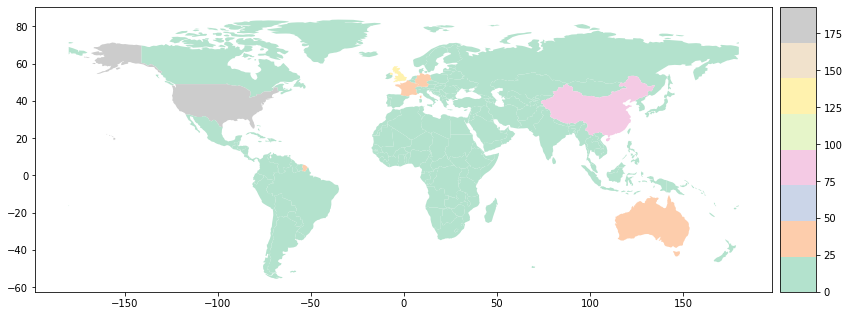

In [16]:
rdf.documents_by_terms('Country', sep=';').worldmap()

### Number of documents per year

In [17]:
rdf.documents_by_year().head()

,Year,Num Documents
0,1994,2
1,1995,0
2,1996,0
3,1997,0
4,1998,0


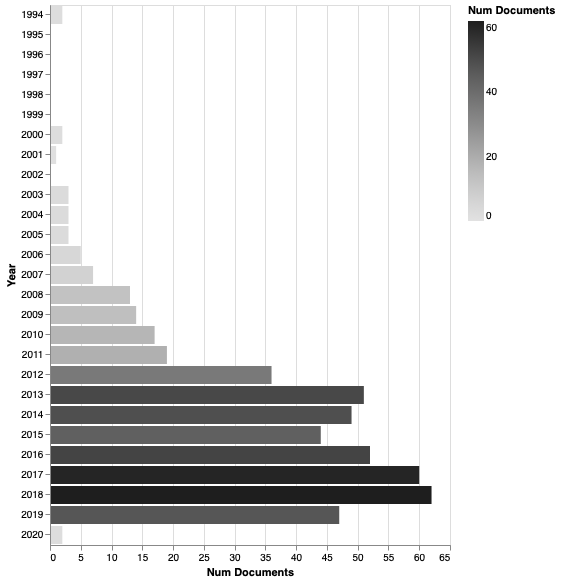

In [18]:
rdf.documents_by_year().barhplot('altair')

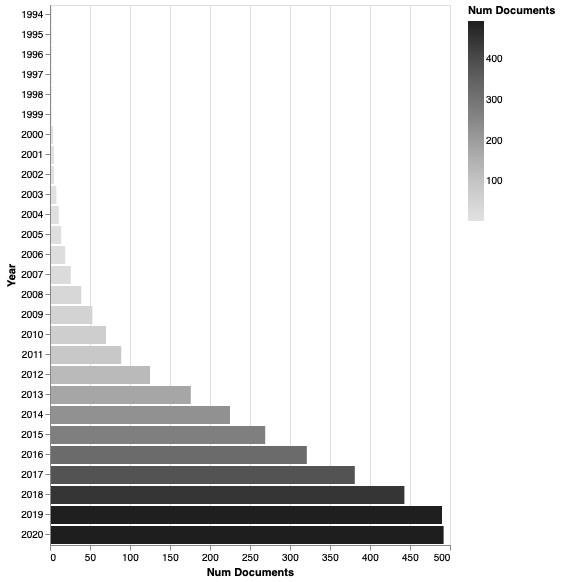

In [19]:
rdf.documents_by_year(cumulative=True).barhplot('altair')

## Citations

### Citations per document

In [20]:
rdf.documents_by_terms('Cited by').head()

,Cited by,Num Documents
0,1.0,57
1,2.0,45
2,3.0,31
3,4.0,23
4,5.0,22


### Citations by year

In [21]:
rdf.citations_by_year().head()

,Year,Cited by
0,1994,3
1,1995,0
2,1996,0
3,1997,0
4,1998,0


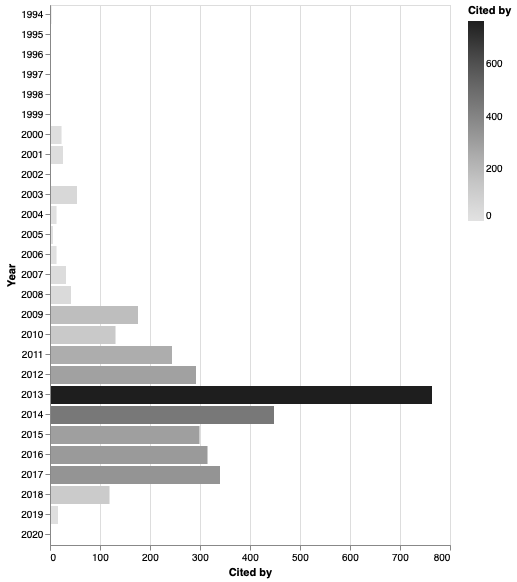

In [22]:
rdf.citations_by_year().barhplot('altair')

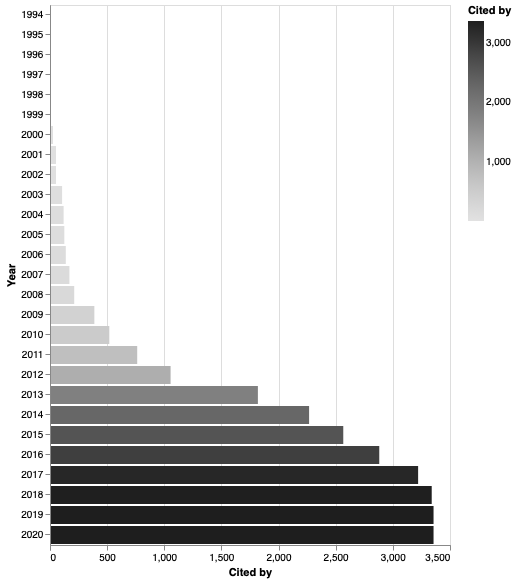

In [23]:
rdf.citations_by_year(cumulative=True).barhplot('altair')

### Citations by terms

In [24]:
rdf.citations_by_terms('Authors', sep=',').head()

,Authors,Cited by
0,Hasbrouck J.,180
1,Saar G.,180
2,Hjalmarsson E.,107
3,Jacobsen H.-A.,107
4,Sadoghi M.,107


In [25]:
rdf.citations_by_terms('Document Type')

,Document Type,Cited by
0,Article,2193
1,Conference Paper,783
2,Review,187
3,Book,106
4,Book Chapter,76
5,Short Survey,11
6,Article in Press,0
7,Note,0


In [26]:
rdf.citations_by_terms('keywords (cleaned)', sep=';').head(10)

,keywords (cleaned),Cited by
0,High-frequency trading,1341
1,Commerce,1114
2,Algorithmic trading,998
3,trading,878
4,Algorithms,714
5,Financial markets,620
6,Electronic trading,523
7,High frequency,482
8,market,434
9,Liquidity,421
